## HW6-Q1

In [70]:
import h5py
import torch
import torch.nn as nn
import torch.utils.data as data
import torch.optim as optim
import matplotlib.pyplot as plt

def load_data(train_file,test_file):
    with h5py.File(train_file,'r') as f:
        x_train=torch.tensor(f['xdata'][:]).float() #to numpy
        y_train=torch.tensor(f['ydata'][:]).float()
    with h5py.File(test_file,'r') as f:
        x_test=torch.tensor(f['xdata'][:]).float()
        y_test=torch.tensor(f['ydata'][:]).float()

    train_dataset=data.TensorDataset(x_train,y_train)
    test_dataset=data.TensorDataset(x_test,y_test)

    train_loader=data.DataLoader(train_dataset,batch_size=100,shuffle=True)
    test_loader=data.DataLoader(test_dataset,batch_size=100,shuffle=False)

    return train_loader,test_loader

train_loader,test_loader=load_data('mnist_traindata.hdf5','mnist_testdata.hdf5')

"""
class Logistic_classification(nn.Module):
    def __init__(self,input_dim=784,num_classes=10):
        super(Logistic_classification,self).__init__()
        self.linear=nn.Linear(input_dim,num_classes)
    def forward(self,x):
        return self.linear(x)
    
model=Logistic_classification()
"""

model=nn.Sequential(
    nn.Linear(784,10)
)

loss_func=nn.CrossEntropyLoss()

learning_rate=0.005
optimizer=optim.SGD(model.parameters(),lr=learning_rate)


In [71]:
#training loop
num_epochs=120

loss_train=[]
loss_test=[]
accuracy_train=[]
accuracy_test=[]

for epoch in range(num_epochs):
    #train
    model.train()
    for images,labels in train_loader:
        images=images.view(-1,784)
        outputs=model(images)
        loss=loss_func(outputs,labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    model.eval()
    #evaluation-train
    correct_train=0
    running_loss=0
    count_sample_train=0
    with torch.no_grad():
        for images,labels in train_loader:
            images=images.view(-1,784)
            outputs=model(images)
            loss=loss_func(outputs,labels)

            running_loss+=loss.item()   #tensor->number
            _,predicted=torch.max(outputs,1)
            true_label=torch.argmax(labels,dim=1)
            correct_train+=(predicted==true_label).sum().item()
            count_sample_train+=labels.shape[0]
    #print(correct_train/count_sample_train)
    loss_train.append(running_loss/len(train_loader))
    accuracy_train.append(correct_train/count_sample_train)

    #evaluation-test
    correct_test=0
    total_loss_test=0
    count_sample_test=0
    with torch.no_grad():
        for images,labels in test_loader:
            images=images.view(-1,784)
            outputs=model(images)
            loss=loss_func(outputs,labels)

            total_loss_test+=loss.item()
            _,predicted=torch.max(outputs,1)
            true_label=torch.argmax(labels,dim=1)
            correct_test+=(predicted==true_label).sum().item()
            count_sample_test+=labels.shape[0]

    loss_test.append(total_loss_test/len(test_loader))
    accuracy_test.append(correct_test/count_sample_test)

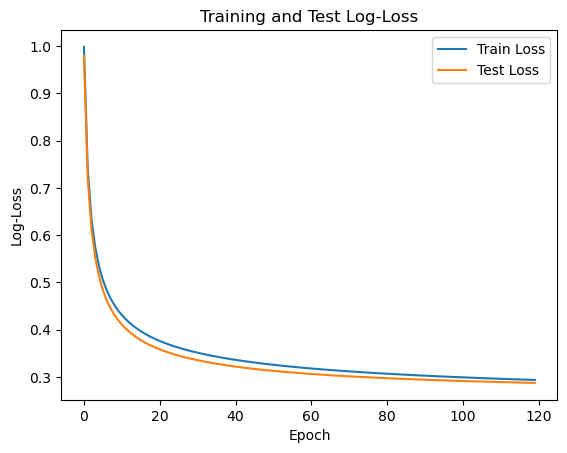

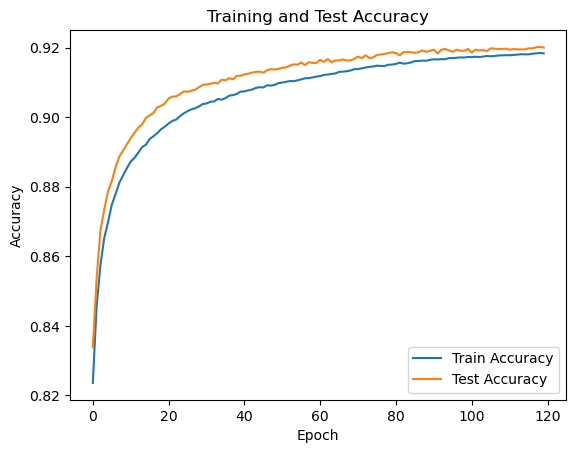

In [72]:
#show the plots
plt.figure()
plt.plot(loss_train, label='Train Loss')
plt.plot(loss_test, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Log-Loss')
plt.title('Training and Test Log-Loss')
plt.legend()
plt.show()

plt.figure()
plt.plot(accuracy_train, label='Train Accuracy')
plt.plot(accuracy_test, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Test Accuracy')
plt.legend()
plt.show()

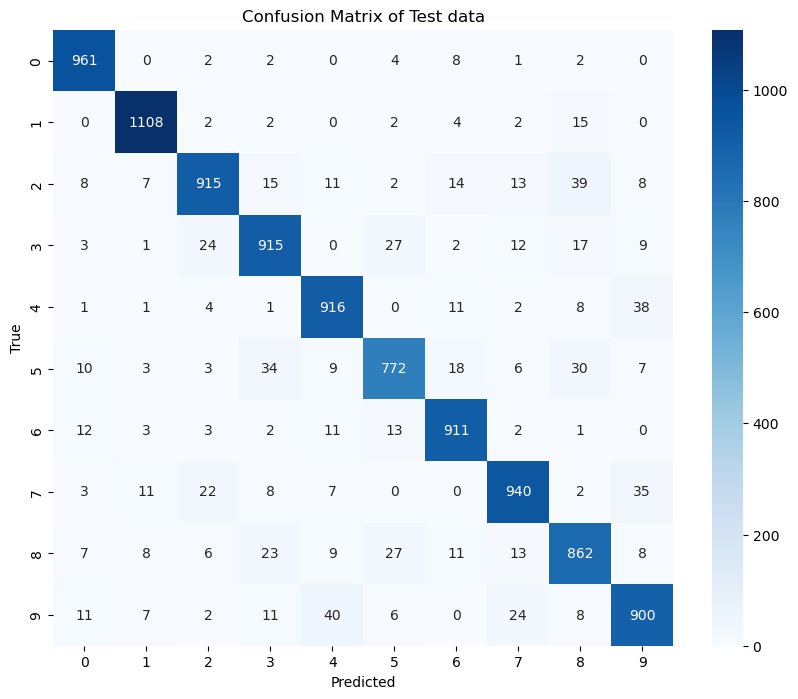

In [73]:
#draw condusion matrix
import seaborn as sns
from sklearn.metrics import confusion_matrix

all_preds=[]
all_labels=[]

model.eval()
with torch.no_grad():
    for images,labels in test_loader:
        images=images.view(-1,784)
        outputs=model(images)
        _, predicted=torch.max(outputs,1)
        true_label=torch.argmax(labels,dim=1)
        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(true_label.cpu().numpy())
        
cm=confusion_matrix(all_labels,all_preds)

plt.figure(figsize=(10, 8))
sns.heatmap(cm,annot=True,fmt="d",cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix of Test data')
plt.show()


- I conducted experiments with different learning rates of 0.1, 0.01, 0.005, and 0.001. I found that when the learning rate was high, the loss decreased quickly, but as shown in the graph, it was very unstable (the curve had oscillations). When the learning rate was low, the steps were too small, resulting in very slow convergence. 
- After comparison, I chose a learning rate of 0.005.

### when use L2 regularization

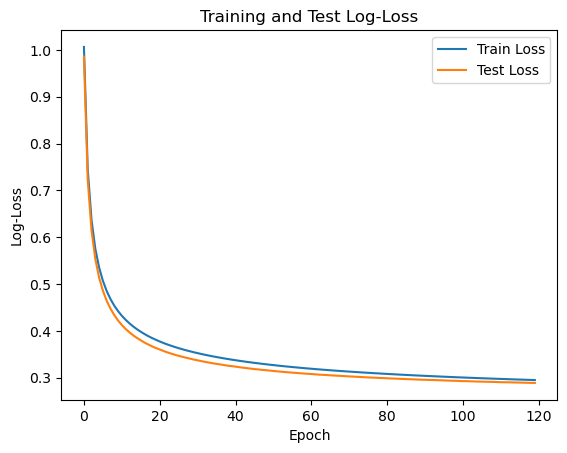

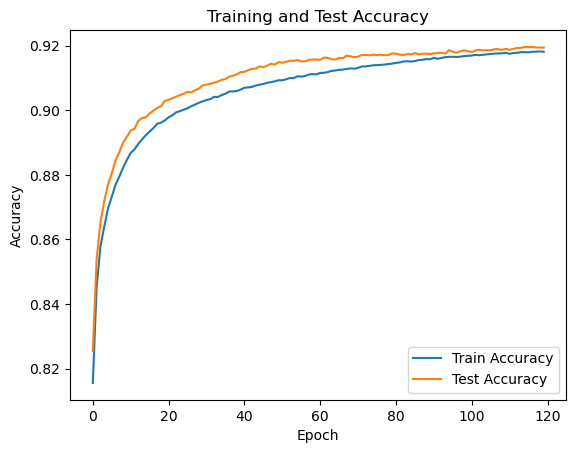

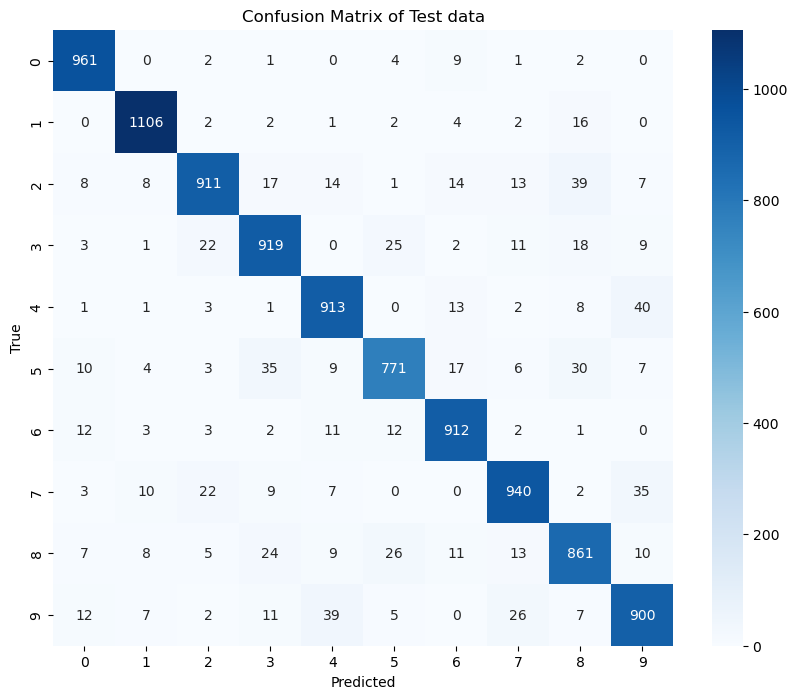

In [78]:
model=nn.Sequential(
    nn.Linear(784,10)
)

l2_lambda=0.0001
optimizer_l=optim.SGD(model.parameters(),lr=learning_rate,weight_decay=l2_lambda)

#training loop
num_epochs=120

loss_train=[]
loss_test=[]
accuracy_train=[]
accuracy_test=[]

for epoch in range(num_epochs):
    #train
    model.train()
    for images,labels in train_loader:
        images=images.view(-1,784)
        outputs=model(images)
        loss=loss_func(outputs,labels)
        optimizer_l.zero_grad()
        loss.backward()
        optimizer_l.step()

    model.eval()
    #evaluation-train
    correct_train=0
    running_loss=0
    count_sample_train=0
    with torch.no_grad():
        for images,labels in train_loader:
            images=images.view(-1,784)
            outputs=model(images)
            loss=loss_func(outputs,labels)

            running_loss+=loss.item()   #tensor->number
            _,predicted=torch.max(outputs,1)
            true_label=torch.argmax(labels,dim=1)
            correct_train+=(predicted==true_label).sum().item()
            count_sample_train+=labels.shape[0]
    #print(correct_train/count_sample_train)
    loss_train.append(running_loss/len(train_loader))
    accuracy_train.append(correct_train/count_sample_train)

    #evaluation-test
    correct_test=0
    total_loss_test=0
    count_sample_test=0
    with torch.no_grad():
        for images,labels in test_loader:
            images=images.view(-1,784)
            outputs=model(images)
            loss=loss_func(outputs,labels)

            total_loss_test+=loss.item()
            _,predicted=torch.max(outputs,1)
            true_label=torch.argmax(labels,dim=1)
            correct_test+=(predicted==true_label).sum().item()
            count_sample_test+=labels.shape[0]

    loss_test.append(total_loss_test/len(test_loader))
    accuracy_test.append(correct_test/count_sample_test)

#show the plots
plt.figure()
plt.plot(loss_train, label='Train Loss')
plt.plot(loss_test, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Log-Loss')
plt.title('Training and Test Log-Loss')
plt.legend()
plt.show()

plt.figure()
plt.plot(accuracy_train, label='Train Accuracy')
plt.plot(accuracy_test, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Test Accuracy')
plt.legend()
plt.show()

#draw condusion matrix
import seaborn as sns
from sklearn.metrics import confusion_matrix

all_preds=[]
all_labels=[]

model.eval()
with torch.no_grad():
    for images,labels in test_loader:
        images=images.view(-1,784)
        outputs=model(images)
        _, predicted=torch.max(outputs,1)
        true_label=torch.argmax(labels,dim=1)
        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(true_label.cpu().numpy())
cm=confusion_matrix(all_labels,all_preds)

plt.figure(figsize=(10, 8))
sns.heatmap(cm,annot=True,fmt="d",cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix of Test data')
plt.show()


The results do not clearly show the effect of L2 regularization; the outcomes are almost the same.